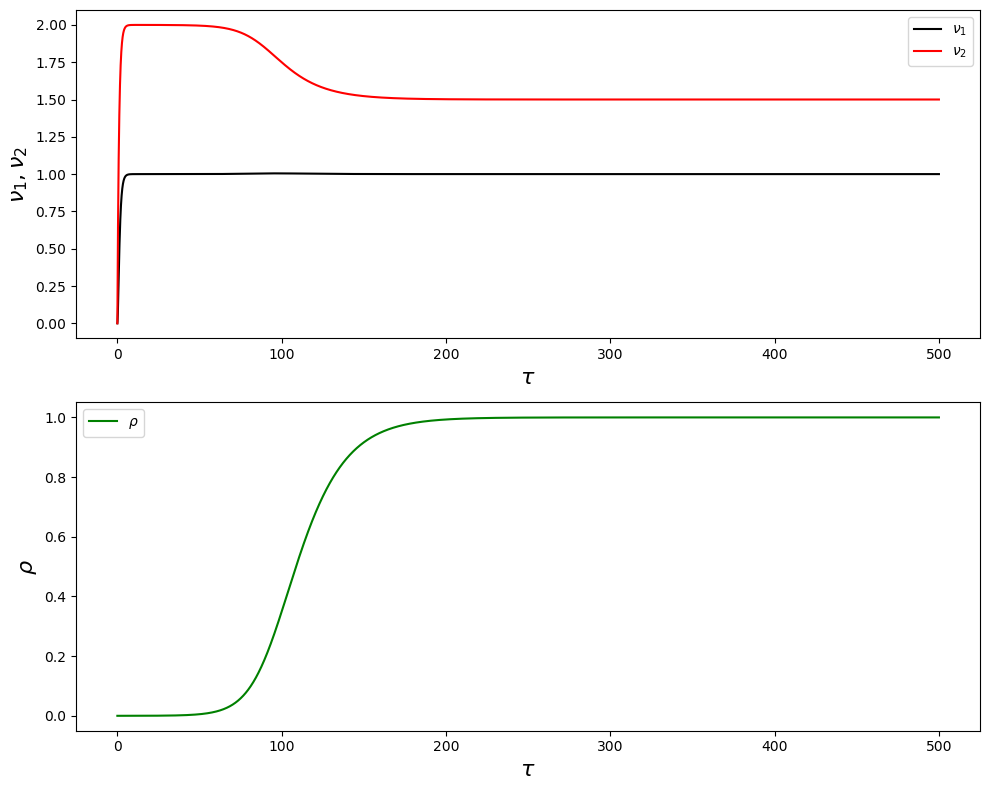

In [2]:
import numpy as np
import matplotlib.pyplot as plt

tau1 = 0.5
tau0 = 10
arn = 2
AptoA = 1e-5
tautau = tau0 * (1 - tau1)

def laser(t, x):
    nu1, nu2, rho = x
    dnu1_dt = nu2 + rho * (nu2 - nu1) - nu1 / tau1
    dnu2_dt = arn + rho * (nu1 - nu2) - nu2
    drho_dt = -rho / tau0 + (AptoA * nu2 + rho * (nu2 - nu1)) * (1 / tautau)
    return np.array([dnu1_dt, dnu2_dt, drho_dt])

def rk4_step(f, t, x, dt):
    k1 = f(t, x)
    k2 = f(t + 0.5 * dt, x + 0.5 * dt * k1)
    k3 = f(t + 0.5 * dt, x + 0.5 * dt * k2)
    k4 = f(t + dt, x + dt * k3)
    return x + (dt / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

x0 = np.array([0, 0, 0])

t0, tf = 0, 500
dt = 0.1
t_values = np.arange(t0, tf, dt)

x_values = np.zeros((len(t_values), 3))
x_values[0] = x0

for i in range(1, len(t_values)):
    t = t_values[i-1]
    x = x_values[i-1]
    x_values[i] = rk4_step(laser, t, x, dt)

plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.plot(t_values, x_values[:, 0], 'k', label=r'$\nu_1$')
plt.plot(t_values, x_values[:, 1], 'r', label=r'$\nu_2$')
plt.xlabel(r'$\tau$', fontsize=16)
plt.ylabel(r'$\nu_1, \nu_2$', fontsize=16)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t_values, x_values[:, 2], 'g', label=r'$\rho$')
plt.xlabel(r'$\tau$', fontsize=16)
plt.ylabel(r'$\rho$', fontsize=16)
plt.legend()

plt.tight_layout()
plt.show()
